# Taller 2: Análisis de Sentimientos en Redes Sociales para Mejorar la Imagen de Marca

## Grupo 6:
 
- Miguel Ángel Pablos  

- María Alejandra Olarte

- Carlos Mauricio Arteaga 

In [1]:
#Librerias
import pandas as pd
import numpy as np

In [2]:
# leer archivo training.1600000.processed.noemoticon.csv

df = pd.read_csv('../../Datos/training.1600000.processed.noemoticon.csv', encoding='latin-1')
df.head()

,polarity of tweet,id of the tweet,date of the tweet,query,user,text of the tweet
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [3]:
# Cambiar nombre de columnas
df.columns = ['Polarity', 'Id_Tweet', 'Date', 'Query', 'User', 'Text']
df.head()

,Polarity,Id_Tweet,Date,Query,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


## Analisis inicial de DataFrame

In [4]:
df['Polarity'].value_counts() # 0 = Negativo, 4 = Positivo, no se encuentran valores neutros

Polarity
0    799996
4    248576
Name: count, dtype: int64

In [5]:
df['Polarity'].value_counts(normalize=True)

Polarity
0    0.762939
4    0.237061
Name: proportion, dtype: float64

-El dataframe en primera instancia esta desbalanceado. es posible que se requiera un balanceo mas adelante despues del procesamiento inicial.

In [6]:
df['User'].value_counts().head(50)

User
lost_dog           549
tweetpet           310
webwoke            264
mcraddictal        238
wowlew             210
SallytheShizzle    201
nuttychris         199
tsarnick           184
Djalfy             164
StDAY              156
Dogbook            152
Karen230683        148
MiDesfileNegro     147
_magic8ball        146
Spidersamm         140
VioletsCRUK        132
JBnVFCLover786     126
mrs_mcsupergirl    123
ramdomthoughts     122
Dutchrudder        122
Broooooke_         120
torilovesbradie    120
karinb_za          118
bigenya            118
kasey79            116
hollyalyxfinch     113
Kikirowr           113
TessMorris         112
dontforgetchaos    111
lesley007          109
Jayme1988          107
keren4562          107
luckygnahhh        104
SongoftheOss       103
sebby_peek         102
Hollywood_Trey     102
SarahMorrison      102
ShesElectric_       98
SarahSaner          98
TraceyHewins        97
roxiijonas          96
QueenBxoxo          95
KevinEdwardsJr      95
keza34

In [7]:
# Configuración para mostrar todo el texto en las columnas
pd.set_option('display.max_colwidth', None)

In [8]:
df

,Polarity,Id_Tweet,Date,Query,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1048567,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048568,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noodles. Yum.
1048569,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Terminiator movies. comes off like just 3 words. :-D
1048570,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


In [9]:
#Mostrar el dataset filtrado por un nombre de usuario

df.loc[df['User'] == 'lost_dog'].sample(20)

,Polarity,Id_Tweet,Date,Query,User,Text
458249,0,2071838614,Sun Jun 07 20:00:09 PDT 2009,NO_QUERY,lost_dog,@gregkureluk I am lost. Please help me find a good home.
127018,0,1834636227,Mon May 18 03:40:54 PDT 2009,NO_QUERY,lost_dog,@johnmashni I am lost. Please help me find a good home.
733199,0,2264261038,Sun Jun 21 03:17:46 PDT 2009,NO_QUERY,lost_dog,@jesswholohan I am lost. Please help me find a good home.
767437,0,2300473364,Tue Jun 23 14:11:29 PDT 2009,NO_QUERY,lost_dog,@steph0515 I am lost. Please help me find a good home.
295153,0,1996787774,Mon Jun 01 15:41:29 PDT 2009,NO_QUERY,lost_dog,@shatter93 I am lost. Please help me find a good home.
339380,0,2014633167,Wed Jun 03 02:10:30 PDT 2009,NO_QUERY,lost_dog,@yLanaRae I am lost. Please help me find a good home.
398750,0,2056972547,Sat Jun 06 12:08:07 PDT 2009,NO_QUERY,lost_dog,@cotntail I am lost. Please help me find a good home.
515279,0,2190806790,Tue Jun 16 03:46:48 PDT 2009,NO_QUERY,lost_dog,@RoryConstant I am lost. Please help me find a good home.
81949,0,1752895305,Sat May 09 23:21:33 PDT 2009,NO_QUERY,lost_dog,@dewdropper I am lost. Please help me find a good home.
692301,0,2252460811,Sat Jun 20 06:19:01 PDT 2009,NO_QUERY,lost_dog,@nevillecurtis I am lost. Please help me find a good home.


In [10]:
# Lista de usuarios cuyos comentarios deseas eliminar
usuarios_a_eliminar = ['lost_dog', 'tweepet', 'SallytheShizzle']  # Agrega los usuarios que desees eliminar

# Filtrar el DataFrame para excluir estos usuarios
df = df[~df['User'].isin(usuarios_a_eliminar)]


In [11]:
#df.loc[df['User'] == 'lost_dog'].sample()

In [12]:
df

,Polarity,Id_Tweet,Date,Query,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1048567,4,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048568,4,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noodles. Yum.
1048569,4,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Terminiator movies. comes off like just 3 words. :-D
1048570,4,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,jonasobsessedx,@DestinyHope92 im great thaanks wbuu?


In [13]:
df['Query'].value_counts()

Query
NO_QUERY    1047822
Name: count, dtype: int64

In [14]:
df.drop(columns=['Query'], inplace=True)
df.head()

C:\Users\aluca\AppData\Local\Temp\ipykernel_2056\4052145128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Query'], inplace=True)


,Polarity,Id_Tweet,Date,User,Text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,joy_wolf,@Kwesidei not the whole crew


### La columna 'Query' no aporta valor al df ya que toda la informacion es la misma.

In [15]:
# Remplazar el valor 4 por 1 en la columna Polarity

df['Polarity'] = df['Polarity'].replace(4, 1)
df['Polarity'].value_counts()

C:\Users\aluca\AppData\Local\Temp\ipykernel_2056\2161282555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Polarity'] = df['Polarity'].replace(4, 1)


Polarity
0    799264
1    248558
Name: count, dtype: int64

### Remplazamos los valores de la columna objetivo para trabajarla de forma binaria (0 negativo, 1 positivo)

In [16]:
# Tratamiento a la columna Date
# Remover la zona horaria del texto
df['Date'] = df['Date'].str.replace(' PDT', '', regex=False)

# Convertir a formato datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


C:\Users\aluca\AppData\Local\Temp\ipykernel_2056\1436940372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].str.replace(' PDT', '', regex=False)
C:\Users\aluca\AppData\Local\Temp\ipykernel_2056\1436940372.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [17]:
df.head(5)

,Polarity,Id_Tweet,Date,User,Text
0,0,1467810672,2009-04-06 22:19:49,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,1467810917,2009-04-06 22:19:53,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,1467811184,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,2009-04-06 22:19:57,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,1467811372,2009-04-06 22:20:00,joy_wolf,@Kwesidei not the whole crew


## Analisis con fechas (EDA)

In [18]:
df_Date_analisis = df[['Polarity', 'Date', 'User']] 
df_Date_analisis


,Polarity,Date,User
0,0,2009-04-06 22:19:49,scotthamilton
1,0,2009-04-06 22:19:53,mattycus
2,0,2009-04-06 22:19:57,ElleCTF
3,0,2009-04-06 22:19:57,Karoli
4,0,2009-04-06 22:20:00,joy_wolf
...,...,...,...
1048567,1,2009-05-29 07:33:44,Madelinedugganx
1048568,1,2009-05-29 07:33:43,OffRoad_Dude
1048569,1,2009-05-29 07:33:44,Falchion
1048570,1,2009-05-29 07:33:44,jonasobsessedx


In [19]:
df_Date_analisis['Date'].dt.year.value_counts() # Solo se tiene información del año 2009

Date
2009    1047822
Name: count, dtype: int64

In [20]:
df_Date_analisis['Date'].dt.month.value_counts() # Se tiene información de los meses de abril, mayo y junio 

Date
6    533056
5    414745
4    100021
Name: count, dtype: int64

In [21]:
#df_Date_analisis['Date'].dt.day.value_counts().sort_index() # Se tiene información de 'todos' los días de los meses de abril, mayo y junio

In [22]:
# informacion de los dias del mes de junio
#df_Date_analisis[df_Date_analisis['Date'].dt.month == 6]['Date'].dt.day.value_counts().sort_index()

In [23]:
# informacion de los dias en el mes de mayo.
#df_Date_analisis[df_Date_analisis['Date'].dt.month == 5]['Date'].dt.day.value_counts().sort_index()

In [24]:
# informacion de los dias en el mes de abril
#df_Date_analisis[df_Date_analisis['Date'].dt.month == 4]['Date'].dt.day.value_counts().sort_index()

In [25]:
# Distruiución de los comentarios por hora
df_Date_analisis['Date'].dt.hour.value_counts().sort_index()

Date
0     55711
1     49443
2     48343
3     48896
4     51488
5     53864
6     56134
7     59418
8     51093
9     42191
10    39171
11    38810
12    30530
13    28689
14    28186
15    29594
16    33106
17    30721
18    32578
19    35696
20    38454
21    50350
22    55855
23    59501
Name: count, dtype: int64

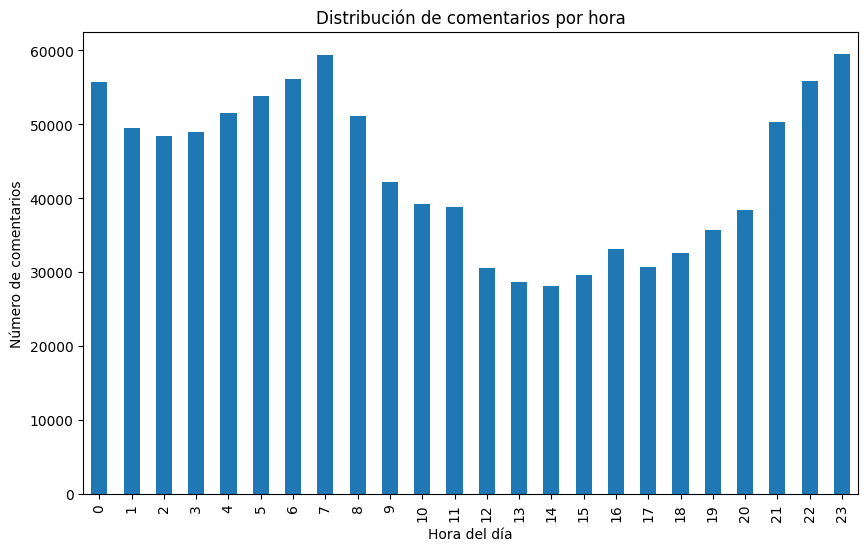

In [26]:
# Graficar la distribución de los comentarios por hora
import matplotlib.pyplot as plt

df_Date_analisis['Date'].dt.hour.value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Distribución de comentarios por hora')
plt.xlabel('Hora del día')
plt.ylabel('Número de comentarios')
plt.show()

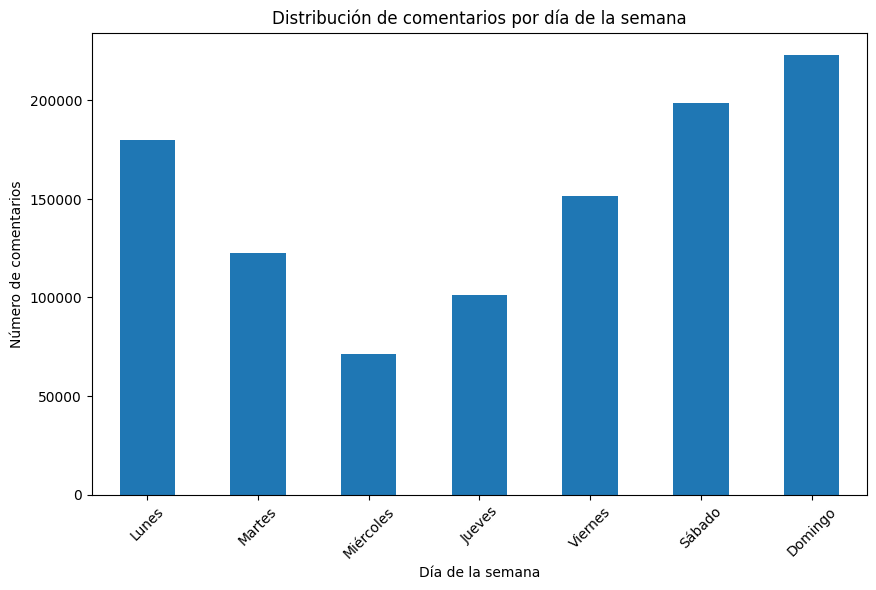

In [27]:
# Distribución de comentarios por día de la semana
df_Date_analisis['Date'].dt.dayofweek.value_counts().sort_index()

# Graficar la distribución de comentarios por día de la semana
df_Date_analisis['Date'].dt.dayofweek.value_counts().sort_index().plot(kind='bar', figsize=(10, 6))
plt.title('Distribución de comentarios por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Número de comentarios')
plt.xticks(ticks=range(7), labels=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'], rotation=45)
plt.show()


## Preprocesamiento del conjunto de datos

### Generando funcion de limpieza para los comentarios.

In [28]:
# Dataframe para analisis de comentarios

df_Text_analisis = df[['Polarity','Text']]
df_Text_analisis

,Polarity,Text
0,0,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
1,0,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."
4,0,@Kwesidei not the whole crew
...,...,...
1048567,1,My GrandMa is making Dinenr with my Mum
1048568,1,Mid-morning snack time... A bowl of cheese noodles. Yum.
1048569,1,@ShaDeLa same here say it like from the Terminiator movies. comes off like just 3 words. :-D
1048570,1,@DestinyHope92 im great thaanks wbuu?


In [29]:
# Sampling para observar estructura de comentarios

df_Text_analisis['Text'].sample(15)

927108                                                              I like Finland's entry for the Eurovision Songfestival: http://bit.ly/8QbFa  
532337    @CritiktheDj LOL I know right?? Uhhh no I wish I can't miss work  were getting everything ready for the students graduation on Friday..
259319                                                                                                        lauren's last episode of the hills 
179264                                   Our currency is dropping like nobodies business; not a good time to be going overseas  http://is.gd/JsgL
919647                                                       @codelust @prolificd caught me at lunch today... you were correct of he stalking me 
475899                                                                                                                   @amycgraham yeah i know 
412302                                                                                                                I was 

In [30]:
from textblob import TextBlob
import html

In [31]:
import re

def clean_data(df_Text_analisis):

    # Asegurar que no hay valores NaN
    df_Text_analisis['Text'] = df_Text_analisis['Text'].fillna('')

    # Decodificar las entidades HTML
    df_Text_analisis['Text'] = df_Text_analisis['Text'].apply(html.unescape)

    # Convertir el texto a minúsculas.
    df_Text_analisis['Text'] = df_Text_analisis['Text'].str.lower()
    
    # Reducir letras repetidas
    df_Text_analisis['Text'] = df_Text_analisis['Text'].apply(lambda x: re.sub(r'(.)\1{2,}', r'\1\1', x))

    # Eliminar palabras repetidas
    df_Text_analisis['Text'] = df_Text_analisis['Text'].apply(lambda x: re.sub(r'\b(\w+)( \1\b)+', r'\1', x))
    
    # Eliminar menciones en la columna 'Text'
    df_Text_analisis['Text'] = df_Text_analisis['Text'].apply(lambda x: re.sub(r'@\w+', '', x))

    # # Eliminar URLs
    df_Text_analisis['Text'] = df_Text_analisis['Text'].apply(lambda x: re.sub(r'http\S+|www\.\S+', '', x))
    
    # Eliminar puntuación
    df_Text_analisis['Text'] = df_Text_analisis['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))

    # Eliminar números
    df_Text_analisis['Text'] = df_Text_analisis['Text'].apply(lambda x: re.sub(r'\d+', '', x))

    # Reemplazar caracteres no alfanuméricos con un espacio
    df_Text_analisis['Text'] = df_Text_analisis['Text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]', ' ', x))

    # Eliminar espacios en blanco adicionales
    df_Text_analisis['Text'] = df_Text_analisis['Text'].apply(lambda x: re.sub(r'\s+', ' ', x))

    # Corregir ortografía
    #df_Text_analisis['Text'] = df_Text_analisis['Text'].apply(lambda x: str(TextBlob(x).correct()))

    # Retornar DataFrame limpio
    return df_Text_analisis

df_Text_analisis_clean = clean_data(df_Text_analisis.copy())
df_Text_analisis_clean.head()

,Polarity,Text
0,0,is upset that he cant update his facebook by texting it and might cry as a result school today also blah
1,0,i dived many times for the ball managed to save the rest go out of bounds
2,0,my whole body feels itchy and like its on fire
3,0,no its not behaving at all im mad why am i here because i cant see you all over there
4,0,not the whole crew


### Libreria para hacer correccion ortografica 

In [32]:
from symspellpy import SymSpell, Verbosity

In [33]:
# Configuración de SymSpell
sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

# Cargar diccionario de frecuencia de palabras
dictionary_path = "../../Datos/frequency_dictionary_en_82_765.txt"  # Ruta del diccionario
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

True

In [34]:
def symspell_correct_text(text):
    # Dividir el texto en palabras, corregirlas y volver a unirlas
    corrected_text = []
    for word in text.split():
        # Buscar la mejor coincidencia para cada palabra
        suggestions = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        # Si hay sugerencias, usar la mejor; de lo contrario, mantener la palabra original
        best_match = suggestions[0].term if suggestions else word
        corrected_text.append(best_match)
    return ' '.join(corrected_text)

In [35]:
# Aplicar la corrección al texto del DataFrame
#df_Text_analisis_clean['Text'] = df_Text_analisis_clean['Text'].apply(symspell_correct_text)
#df_Text_analisis_clean.head()

In [81]:
df_Text_analisis_clean['Text'].sample(15)

162697                                    today weigh lost pound week depress
430760                               idea whi updat never show main page like
54823                                        ya kejang amp pingsan thank dude
692606                                           work day today much saturday
964139     thank tab elder stray who appreci creatur comfort voluntarili stay
838401                                                  go bed nail neon pink
1043712                                                       lve jesus k bye
870704            isnt truth lucki live beauti spot especi summer notic beach
19037                                                         miss amaz peopl
740330                              oh nevermind thought talk someon els baww
74946                                fifa footbal soccer capetown almost gone
317381                                                              yeah nice
839546                                        feel like accompli

### Limpieza de stopwords, lematizacion, Stemming.

In [37]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [39]:
''' # Función para eliminar stopwords
def remove_stopwords(text):
    words = text.split()  # Dividir el texto en palabras
    clean_words = [word for word in words if word not in stopwords.words('english')]  # Filtrar palabras
    return ' '.join(clean_words)  # Volver a unir palabras

# Aplicar la función a la columna 'Text' del DataFrame
df_Text_analisis_clean['Text'] = df_Text_analisis_clean['Text'].apply(remove_stopwords)

# Visualizar las primeras filas del DataFrame limpio
df_Text_analisis_clean.head()
'''
''' # Función para lematizar
def lemmatize_column(corpus):
    lem = WordNetLemmatizer()
    # Aplicar lematización a cada palabra en cada fila de la columna 'Text'
    corpus = [' '.join([lem.lemmatize(word, pos='v') for word in text.split()]) for text in corpus]
    return corpus

# Aplicar la función a la columna 'Text'
df_Text_analisis_clean['Text'] = lemmatize_column(df_Text_analisis_clean['Text'])

# Visualizar las primeras filas del DataFrame limpio
df_Text_analisis_clean.head()
'''

" # Función para lematizar\ndef lemmatize_column(corpus):\n    lem = WordNetLemmatizer()\n    # Aplicar lematización a cada palabra en cada fila de la columna 'Text'\n    corpus = [' '.join([lem.lemmatize(word, pos='v') for word in text.split()]) for text in corpus]\n    return corpus\n\n# Aplicar la función a la columna 'Text'\ndf_Text_analisis_clean['Text'] = lemmatize_column(df_Text_analisis_clean['Text'])\n\n# Visualizar las primeras filas del DataFrame limpio\ndf_Text_analisis_clean.head()\n"

### Funcion de procesamiento.

In [40]:
# Remover stopwords
def stopwords_removal(corpus):
    wh_words = ['who', 'what', 'when', 'why', 'how', 'which', 'where', 'whom']
    stop = set(stopwords.words('english'))
    stop = stop - set(wh_words)  # Excluir palabras WH
    return [' '.join([word for word in text.split() if word not in stop]) for text in corpus]

# Stemming
def stem(corpus, stem_type=None):
    if stem_type == 'snowball':
        stemmer = SnowballStemmer(language='english')
    else:
        stemmer = PorterStemmer()
    return [' '.join([stemmer.stem(word) for word in text.split()]) for text in corpus]

# Lematización
def lemmatize_column(corpus):
    lem = WordNetLemmatizer()
    return [' '.join([lem.lemmatize(word, pos='v') for word in text.split()]) for text in corpus]

# Preprocesamiento principal
def preprocess(corpus, stemming=True, stem_type=None, remove_stopwords=True, lemmatization=False):
    # Remover stopwords
    if remove_stopwords:
        corpus = stopwords_removal(corpus)
    
    # Aplicar stemming
    if stemming:
        corpus = stem(corpus, stem_type)
    
    # Aplicar lematización
    if lemmatization:
        corpus = lemmatize_column(corpus)
    
    return corpus

In [41]:
# Aplicar preprocesamiento al texto
df_Text_analisis_clean['Text'] = preprocess(df_Text_analisis_clean['Text'], stemming=True, stem_type='snowball', remove_stopwords=True, lemmatization=False)

In [79]:
df_Text_analisis_clean['Text'].sample(15)

167377                           beer garden ipod friday night shame ive got work tomorrow
414794                                              headach guess when move bedroom around
574358      oh crap eaten load chocol cooki self control buy special nme magazin dedic kol
152398                                                  day alon ftl start paint geni room
62035      geni week wind weve gotten quit bit done debunk famili stori proven neat servic
905548        good morn kid go back school sick day look forward product week happi monday
613344                                                               im hungri want chines
544551                                                          bore bore bore need someth
383555                                                                   miss good old day
974550       attack dayor attack kid aw toy kid cours hope great wwmyspacecomthemesforscen
82313                                                            cant tweet away home wifi

In [43]:
# Exportar el DataFrame limpio a un archivo CSV
#df_Text_analisis_clean.to_csv('../../Datos/Text_Clean.csv', index=False)

## Nube de palabras

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

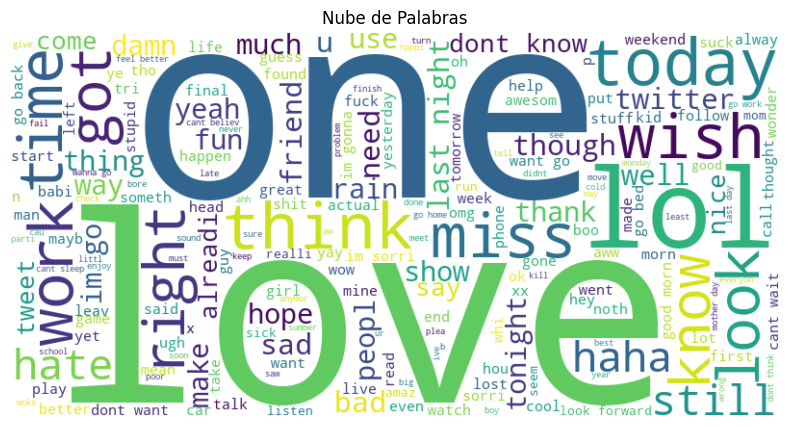

In [45]:
text_data = ' '.join(df_Text_analisis_clean['Text'].dropna())


wordcloud = WordCloud(
    width=800, height=400,  # Dimensiones de la nube
    background_color='white',  # Fondo blanco
    max_words=200,  # Máximo número de palabras
    colormap='viridis',  # Esquema de colores
    stopwords=None  # Puedes añadir palabras a ignorar si es necesario
).generate(text_data)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar ejes
plt.title('Nube de Palabras')
plt.show()

In [46]:
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk import ngrams
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\aluca\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [47]:
# data frame para analisis de n-gramas
df_ngram = df_Text_analisis_clean.copy()
df_ngram

,Polarity,Text
0,0,upset cant updat facebook text might cri result school today also blah
1,0,dive mani time ball manag save rest go bound
2,0,whole bodi feel itchi like fire
3,0,behav im mad whi cant see
4,0,whole crew
...,...,...
1048567,1,grandma make dinenr mum
1048568,1,midmorn snack time bowl chees noodl yum
1048569,1,say like termini movi come like word
1048570,1,im great thaank wbuu


### Tokenizar el texto y obtener trigramas

In [48]:
# Tokenizar el texto
df_ngram['Text_token'] = df_ngram['Text'].apply(lambda x: word_tokenize(x))

# Generar n-gramas (por ejemplo, trigramas n=3)
df_ngram['Ngrams'] = df_ngram['Text_token'].apply(lambda x: list(ngrams(x, 3)))

# Verificar el resultado
print(df_ngram[['Text', 'Ngrams']].head())

                                                                     Text  \
0  upset cant updat facebook text might cri result school today also blah   
1                            dive mani time ball manag save rest go bound   
2                                         whole bodi feel itchi like fire   
3                                               behav im mad whi cant see   
4                                                              whole crew   

                                                                                                                                                                                                                                    Ngrams  
0  [(upset, cant, updat), (cant, updat, facebook), (updat, facebook, text), (facebook, text, might), (text, might, cri), (might, cri, result), (cri, result, school), (result, school, today), (school, today, also), (today, also, blah)]  
1                                                              

### Conteo de los N-gramas

### Metodo 1

In [49]:
# Contar la frecuencia de los n-gramas
ngram_freq = df_ngram['Ngrams'].explode().value_counts().reset_index()
ngram_freq.columns = ['Ngram', 'Frequency']

# Verificar el resultado
print(ngram_freq.head(50))



                   Ngram  Frequency
0          (im, gon, na)       4599
1          (wan, na, go)       3617
2        (dont, wan, na)       2721
3   (happi, mother, day)       2180
4        (gon, na, miss)       1746
5     (dont, know, what)       1699
6       (dont, want, go)       1140
7          (gon, na, go)       1087
8      (dont, know, how)       1015
9      (wish, could, go)       1001
10  (hope, feel, better)        947
11        (wan, na, see)        922
12     (cant, wait, see)        908
13         (got, ta, go)        881
14    (get, readi, work)        802
15        (im, go, miss)        768
16    (dont, feel, good)        766
17        (gon, na, get)        738
18     (dont, know, whi)        722
19        (got, ta, get)        713
20      (feel, like, im)        699
21      (get, readi, go)        680
22     (go, back, sleep)        638
23  (feel, better, soon)        634
24      (want, go, back)        626
25      (want, go, home)        621
26     (im, sorri, hear)    

### Metodo 2

In [50]:
# Conteo de n-gramas con el metodo CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

# Crear un objeto CountVectorizer
vectorizer = CountVectorizer(ngram_range=(3, 3), max_features=100)

# Ajustar y transformar el texto
X = vectorizer.fit_transform(df_ngram['Text'])

# Obtener las palabras n-grama
ngrams = vectorizer.get_feature_names_out()

# Obtener la frecuencia de las palabras n-grama
ngram_freq = X.sum(axis=0).A1

# Crear un DataFrame con las palabras n-grama y su frecuencia
ngram_freq_df = pd.DataFrame({'Ngram': ngrams, 'Frequency': ngram_freq})

# Ordenar el DataFrame por frecuencia
ngram_freq_df = ngram_freq_df.sort_values(by='Frequency', ascending=False)

# Verificar el resultado
print(ngram_freq_df.head(50))

                 Ngram  Frequency
46    happi mother day       2180
17      dont know what       1699
24        dont want go       1143
47    hope feel better       1037
16       dont know how       1016
98       wish could go       1005
57       im gonna miss        958
8        cant wait see        908
22       dont wanna go        869
35      get readi work        802
53          im go miss        768
13      dont feel good        767
19       dont know whi        722
31        feel like im        700
34        get readi go        681
39       go back sleep        638
28    feel better soon        634
89        want go back        626
90        want go home        621
61       im sorri hear        581
77      realli want go        559
87       wanna go home        514
84         think im go        507
14      dont feel like        501
29      feel like crap        484
40        go back work        481
45    happi father day        453
9       cant wait till        448
75    realli d

### Metodo 3

In [51]:
from collections import Counter

# Contar las frecuencias de los bigramas
ngram_frequencies = Counter([ngram for sublist in df_ngram['Ngrams'] for ngram in sublist])

# Convertir el contador a un DataFrame
ngram_freq_df = pd.DataFrame(ngram_frequencies.items(), columns=['Ngram', 'Frequency'])

# Ordenar el DataFrame por la frecuencia de los bigramas
ngram_freq_df = ngram_freq_df.sort_values(by='Frequency', ascending=False)

# Mostrar los 50 trigramas más comunes
print(ngram_freq_df.head(50))

                        Ngram  Frequency
1167            (im, gon, na)       4599
668             (wan, na, go)       3617
7861          (dont, wan, na)       2721
390404   (happi, mother, day)       2180
4332          (gon, na, miss)       1746
507        (dont, know, what)       1699
1334         (dont, want, go)       1140
3253            (gon, na, go)       1087
14926       (dont, know, how)       1015
4108        (wish, could, go)       1001
3013     (hope, feel, better)        947
4712           (wan, na, see)        922
8205        (cant, wait, see)        908
4500            (got, ta, go)        881
7821       (get, readi, work)        802
25498          (im, go, miss)        768
29785      (dont, feel, good)        766
1168           (gon, na, get)        738
203         (dont, know, whi)        722
4130           (got, ta, get)        713
5527         (feel, like, im)        699
6505         (get, readi, go)        680
9497        (go, back, sleep)        638
10397    (feel, 

### Metodo utilizado en clase

In [52]:
vectorizer_ngram_range = CountVectorizer(analyzer='word', ngram_range=(3, 3), max_features=5000)
bow_matrix_ngram = vectorizer_ngram_range.fit_transform(df_ngram['Text'])
print(vectorizer_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())


['abl fall asleep' 'abl go back' 'abl sleep tonight' ... 'youv got fever'
 'youv got high' 'yr old girl']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Vectorización, TF-IDF

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un objeto TfidfVectorizer con un número limitado de características
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 3), analyzer='word')

# Ajustar y transformar el texto
X = vectorizer.fit_transform(df_Text_analisis_clean['Text'])

# Obtener nombres de las palabras
words = vectorizer.get_feature_names_out()


In [54]:
y = df_Text_analisis_clean['Polarity']

In [55]:
# Dividir el conjunto de datos en entrenamiento y prueba

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Generacion de modelos de ML

### Naive Bayes

In [56]:
# Entrenamiento de modelo de clasificación con Naive Bayes

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Crear un clasificador Naive Bayes
nb_classifier = MultinomialNB()

# Entrenar el clasificador
nb_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = nb_classifier.predict(X_test)

# Evaluar el rendimiento del clasificador Naive Bayes, metricas accuracy, matriz de confusión, classification report

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el reporte de clasificación
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print(f'Precisión: {accuracy}')
print(f'Matriz de confusión:\n{conf_matrix}')
print(f'Reporte de clasificación:\n{class_report}')



Precisión: 0.8114761529835612
Matriz de confusión:
[[156540   3313]
 [ 36195  13517]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89    159853
           1       0.80      0.27      0.41     49712

    accuracy                           0.81    209565
   macro avg       0.81      0.63      0.65    209565
weighted avg       0.81      0.81      0.77    209565



### SGDClassifier

In [57]:
### implementacion de modelo de clasificacion SGDClassifier

from sklearn.linear_model import SGDClassifier

# Crear un clasificador SGD

sgd_classifier = SGDClassifier()

# Entrenar el clasificador
sgd_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = sgd_classifier.predict(X_test)

# Evaluar el rendimiento del clasificador SGD, metricas accuracy, matriz de confusión, classification report

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el reporte de clasificación
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print(f'Precisión: {accuracy}')
print(f'Matriz de confusión:\n{conf_matrix}')
print(f'Reporte de clasificación:\n{class_report}')


Precisión: 0.8018753131486651
Matriz de confusión:
[[157535   2318]
 [ 39202  10510]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.80      0.99      0.88    159853
           1       0.82      0.21      0.34     49712

    accuracy                           0.80    209565
   macro avg       0.81      0.60      0.61    209565
weighted avg       0.81      0.80      0.75    209565



### XGBoost

In [58]:
### implementacion del modelo XGBoost

from xgboost import XGBClassifier

# Crear un clasificador XGBoost

xgb_classifier = XGBClassifier()

# Entrenar el clasificador
xgb_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = xgb_classifier.predict(X_test)

# Evaluar el rendimiento del clasificador XGBoost, metricas accuracy, matriz de confusión, classification report

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el reporte de clasificación
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print(f'Precisión: {accuracy}')
print(f'Matriz de confusión:\n{conf_matrix}')
print(f'Reporte de clasificación:\n{class_report}')


Precisión: 0.8084651540094958
Matriz de confusión:
[[155655   4198]
 [ 35941  13771]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.97      0.89    159853
           1       0.77      0.28      0.41     49712

    accuracy                           0.81    209565
   macro avg       0.79      0.63      0.65    209565
weighted avg       0.80      0.81      0.77    209565



### SVM con muestreo aleatorio

In [59]:
### Implementacion del modelo linearSVC, realizar muestra de 10000 registros para optimizar el tiempo de ejecucion

df_sample = df_Text_analisis_clean.sample(800000, random_state=42)

X = vectorizer.fit_transform(df_sample['Text'])

y = df_sample['Polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.svm import LinearSVC

# Crear un clasificador LinearSVC

lsvc_classifier = LinearSVC()

# Entrenar el clasificador
lsvc_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = lsvc_classifier.predict(X_test)

# Evaluar el rendimiento del clasificador LinearSVC, metricas accuracy, matriz de confusión, classification report

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el reporte de clasificación
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print(f'Precisión: {accuracy}')
print(f'Matriz de confusión:\n{conf_matrix}')
print(f'Reporte de clasificación:\n{class_report}')



Precisión: 0.8333375
Matriz de confusión:
[[115318   6627]
 [ 20039  18016]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90    121945
           1       0.73      0.47      0.57     38055

    accuracy                           0.83    160000
   macro avg       0.79      0.71      0.74    160000
weighted avg       0.82      0.83      0.82    160000



In [60]:
'''# Entrenamiento de modelo de clasificación con SVM

from sklearn.svm import SVC

# Crear un clasificador SVM

svm_classifier = SVC(kernel='linear')

# Entrenar el clasificador
svm_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = svm_classifier.predict(X_test)

# Evaluar el rendimiento del clasificador SVM, metricas accuracy, matriz de confusión, classification report

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el reporte de clasificación
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print(f'Precisión: {accuracy}')
print(f'Matriz de confusión:\n{conf_matrix}')
print(f'Reporte de clasificación:\n{class_report}')'''


"# Entrenamiento de modelo de clasificación con SVM\n\nfrom sklearn.svm import SVC\n\n# Crear un clasificador SVM\n\nsvm_classifier = SVC(kernel='linear')\n\n# Entrenar el clasificador\nsvm_classifier.fit(X_train, y_train)\n\n# Realizar predicciones\ny_pred = svm_classifier.predict(X_test)\n\n# Evaluar el rendimiento del clasificador SVM, metricas accuracy, matriz de confusión, classification report\n\n# Calcular la precisión\naccuracy = accuracy_score(y_test, y_pred)\n\n# Calcular la matriz de confusión\nconf_matrix = confusion_matrix(y_test, y_pred)\n\n# Calcular el reporte de clasificación\nclass_report = classification_report(y_test, y_pred)\n\n# Mostrar los resultados\nprint(f'Precisión: {accuracy}')\nprint(f'Matriz de confusión:\n{conf_matrix}')\nprint(f'Reporte de clasificación:\n{class_report}')"

## Mejora de rendimiento modelo ML.

### Mejora de hiperparametros para el modelo XGBoost

In [61]:
### Mejora de hiperparametros para el modelos XGBoost

from sklearn.model_selection import RandomizedSearchCV

# Configuración del modelo XGBoost para ajuste de hiperparámetros
modelo_xgb = XGBClassifier()

# Parámetros a ajustar
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'scale_pos_weight': [1, 10, 25]
}

# Metricas a evaluar

scoring = {
    'recall': 'recall',  # Métrica de sensibilidad
    'accuracy': 'accuracy',  # Métrica de precisión global
    'f1-score': 'f1'  # Métrica F1
}


# Configuración de RandomizedSearchCV con múltiples métricas
random_search = RandomizedSearchCV(
    estimator=modelo_xgb,
    param_distributions=param_grid,
    n_iter=8,  # Número de combinaciones aleatorias a probar
    scoring=scoring,  # Métricas de evaluación
    refit='f1-score',  # Métrica principal para refit 
    cv=3,  # Validación cruzada
    verbose=1,
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=42
)

# Ajustar el modelo
random_search.fit(X_train, y_train)

#Mejores hiperparametros
print('Mejores hiperparámetros:')
print(random_search.best_params_)
print('Mejor puntuación de Recall:')
print(random_search.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Mejores hiperparámetros:
{'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Mejor puntuación de Recall:
0.4469378612331835


In [62]:
# Configuración del modelo XGBoost con los hiperparámetros optimizados

modelo_xgb_optimizado = random_search.best_estimator_

# Realizar predicciones
y_pred = modelo_xgb_optimizado.predict(X_test)

# Evaluar el rendimiento del clasificador XGBoost optimizado, metricas accuracy, matriz de confusión, classification report

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el reporte de clasificación
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print(f'Precisión: {accuracy}')
print(f'Matriz de confusión:\n{conf_matrix}')
print(f'Reporte de clasificación:\n{class_report}')


Precisión: 0.4264625
Matriz de confusión:
[[31112 90833]
 [  933 37122]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.26      0.40    121945
           1       0.29      0.98      0.45     38055

    accuracy                           0.43    160000
   macro avg       0.63      0.62      0.43    160000
weighted avg       0.81      0.43      0.41    160000



### Balance de clases

In [63]:
from collections import Counter

print("Distribución de clases en el entrenamiento:", Counter(y_train))
print("Distribución de clases en el test:", Counter(y_test))

Distribución de clases en el entrenamiento: Counter({0: 488332, 1: 151668})
Distribución de clases en el test: Counter({0: 121945, 1: 38055})


### Hacer undersampling de la clase mayoritaria

In [64]:
### Hacer undersampling de la clase mayoritaria

from imblearn.under_sampling import RandomUnderSampler

# Crear un objeto RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Aplicar el muestreo
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print("Distribución de clases después de aplicar undersampling:", Counter(y_resampled))



Distribución de clases después de aplicar undersampling: Counter({0: 151668, 1: 151668})


### Entrenar el clasificador XGBoost con los datos balanceados


In [65]:
# Entrenar el clasificador XGBoost con los datos balanceados

# Crear un clasificador XGBoost
xgb_classifier_balanced = XGBClassifier()

# Entrenar el clasificador
xgb_classifier_balanced.fit(X_resampled, y_resampled)

# Realizar predicciones
y_pred = xgb_classifier_balanced.predict(X_test)

# Evaluar el rendimiento del clasificador XGBoost balanceado, metricas accuracy, matriz de confusión, classification report

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el reporte de clasificación
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print(f'Precisión: {accuracy}')
print(f'Matriz de confusión:\n{conf_matrix}')
print(f'Reporte de clasificación:\n{class_report}')



Precisión: 0.70895625
Matriz de confusión:
[[82143 39802]
 [ 6765 31290]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.92      0.67      0.78    121945
           1       0.44      0.82      0.57     38055

    accuracy                           0.71    160000
   macro avg       0.68      0.75      0.68    160000
weighted avg       0.81      0.71      0.73    160000



### Realizar oversampling de la clase minoritaria con SMOTE


In [66]:
### Realizar oversampling de la clase minoritaria con SMOTE

from imblearn.over_sampling import SMOTE

# Crear un objeto SMOTE
smote = SMOTE(random_state=42)

# Aplicar el muestreo
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Distribución de clases después de aplicar oversampling:", Counter(y_resampled))

Distribución de clases después de aplicar oversampling: Counter({0: 488332, 1: 488332})


### Entrenar el clasificador XGBoost con los datos balanceados


In [67]:
# Entrenar el clasificador XGBoost con los datos balanceados

# Crear un clasificador XGBoost
xgb_classifier_balanced = XGBClassifier()

# Entrenar el clasificador
xgb_classifier_balanced.fit(X_resampled, y_resampled)

# Realizar predicciones
y_pred = xgb_classifier_balanced.predict(X_test)

# Evaluar el rendimiento del clasificador XGBoost balanceado, metricas accuracy, matriz de confusión, classification report

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el reporte de clasificación
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print(f'Precisión: {accuracy}')
print(f'Matriz de confusión:\n{conf_matrix}')
print(f'Reporte de clasificación:\n{class_report}')

Precisión: 0.75344375
Matriz de confusión:
[[94461 27484]
 [11965 26090]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83    121945
           1       0.49      0.69      0.57     38055

    accuracy                           0.75    160000
   macro avg       0.69      0.73      0.70    160000
weighted avg       0.79      0.75      0.77    160000



### Mejora de hiperparametros para el modelo linearSVC

In [68]:
### Mejora de hiperparametros para el modelo linearSVC

# Configuración del modelo LinearSVC para ajuste de hiperparámetros
modelo_lsvc = LinearSVC()

# Parámetros a ajustar
param_grid = {
    'C': [0.1, 1, 10, 100],
    'loss': ['hinge', 'squared_hinge'],
    'max_iter': [1000, 2000, 3000]
}

# Configuración de RandomizedSearchCV con múltiples métricas

random_search = RandomizedSearchCV(
    estimator=modelo_lsvc,
    param_distributions=param_grid,
    n_iter=8,  # Número de combinaciones aleatorias a probar
    scoring=scoring,  # Métricas de evaluación
    refit='f1-score',  # Métrica principal para refit 
    cv=3,  # Validación cruzada
    verbose=1,
    n_jobs=-1,  # Usar todos los núcleos disponibles
    random_state=42
)

# Ajustar el modelo
random_search.fit(X_train, y_train)

#Mejores hiperparametros
print('Mejores hiperparámetros:')
print(random_search.best_params_)
print('Mejor puntuación de Recall:')
print(random_search.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Mejores hiperparámetros:
{'max_iter': 2000, 'loss': 'squared_hinge', 'C': 10}
Mejor puntuación de Recall:
0.5725998839150558


In [69]:
# Configuración del modelo LinearSVC con los hiperparámetros optimizados

modelo_lsvc_optimizado = random_search.best_estimator_

# Realizar predicciones

y_pred = modelo_lsvc_optimizado.predict(X_test)

# Evaluar el rendimiento del clasificador LinearSVC optimizado, metricas accuracy, matriz de confusión, classification report

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el reporte de clasificación
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print(f'Precisión: {accuracy}')
print(f'Matriz de confusión:\n{conf_matrix}')
print(f'Reporte de clasificación:\n{class_report}')



Precisión: 0.83325625
Matriz de confusión:
[[115251   6694]
 [ 19985  18070]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90    121945
           1       0.73      0.47      0.58     38055

    accuracy                           0.83    160000
   macro avg       0.79      0.71      0.74    160000
weighted avg       0.82      0.83      0.82    160000



### reduccion de dimensionalidad con PCA

In [70]:
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

# Crear un objeto TruncatedSVD
svd = TruncatedSVD(n_components=100, random_state=42)

# Ajustar y transformar los datos
X_reduced = svd.fit_transform(X)

# Dividir los datos en entrenamiento y prueba
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Crear y entrenar el clasificador XGBoost
xgb_classifier_pca = XGBClassifier()
xgb_classifier_pca.fit(X_train_pca, y_train_pca)

# Realizar predicciones
y_pred = xgb_classifier_pca.predict(X_test_pca)

# Evaluar el modelo
accuracy = accuracy_score(y_test_pca, y_pred)
conf_matrix = confusion_matrix(y_test_pca, y_pred)
class_report = classification_report(y_test_pca, y_pred)

print(f"Precisión: {accuracy}")
print(f"Matriz de confusión:\n{conf_matrix}")
print(f"Reporte de clasificación:\n{class_report}")

Precisión: 0.80370625
Matriz de confusión:
[[115773   6172]
 [ 25235  12820]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88    121945
           1       0.68      0.34      0.45     38055

    accuracy                           0.80    160000
   macro avg       0.75      0.64      0.67    160000
weighted avg       0.79      0.80      0.78    160000



In [71]:
'''### aplicacion de modelo de redes neuronales

from sklearn.neural_network import MLPClassifier

# Crear un clasificador MLP
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Entrenar el clasificador
mlp_classifier.fit(X_train, y_train)

# Realizar predicciones
y_pred = mlp_classifier.predict(X_test)

# Evaluar el rendimiento del clasificador MLP, metricas accuracy, matriz de confusión, classification report

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular el reporte de clasificación
class_report = classification_report(y_test, y_pred)

# Mostrar los resultados
print(f'Precisión: {accuracy}')
print(f'Matriz de confusión:\n{conf_matrix}')
print(f'Reporte de clasificación:\n{class_report}')
'''


"### aplicacion de modelo de redes neuronales\n\nfrom sklearn.neural_network import MLPClassifier\n\n# Crear un clasificador MLP\nmlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)\n\n# Entrenar el clasificador\nmlp_classifier.fit(X_train, y_train)\n\n# Realizar predicciones\ny_pred = mlp_classifier.predict(X_test)\n\n# Evaluar el rendimiento del clasificador MLP, metricas accuracy, matriz de confusión, classification report\n\n# Calcular la precisión\naccuracy = accuracy_score(y_test, y_pred)\n\n# Calcular la matriz de confusión\nconf_matrix = confusion_matrix(y_test, y_pred)\n\n# Calcular el reporte de clasificación\nclass_report = classification_report(y_test, y_pred)\n\n# Mostrar los resultados\nprint(f'Precisión: {accuracy}')\nprint(f'Matriz de confusión:\n{conf_matrix}')\nprint(f'Reporte de clasificación:\n{class_report}')\n"